In [1]:
import os
import pandas as pd
import xml.etree.ElementTree as ET

In [2]:
train_dir='C:/Users/LENOVO/Desktop/POS-tagger/Assignment-files/Train-corpus'

words=[]
tags=[]
sentences=[]

for _dir, subdir, files in os.walk(train_dir):
    for files in files:
        tree=ET.parse(os.path.join(os.path.abspath(_dir),files))
        root=tree.getroot()
        for ele in root.findall('.//'):
            if(ele.tag=='w' or ele.tag=='c'):
                words.append(ele.text)
                tags.append(ele.attrib['c5'])
                        
data={'WORDS': words, 'POS_TAGS': tags}
pd.DataFrame(data).to_csv('train words_postag table.csv', index=False)

In [2]:
df=pd.read_csv('train words_postag table.csv')
df.head()

,WORDS,POS_TAGS
0,NEWS,NN1
1,IN,PRP
2,FOCUS,NN1
3,Published,VVN
4,by,PRP


In [3]:
df.tail()

,WORDS,POS_TAGS
10348610,Vera,NP0
10348611,N.,NP0
10348612,Paul,NP0
10348613,",",PUN
10348614,O.B.E.,NP0


In [6]:
test_dir='C:/Users/LENOVO/Desktop/POS-tagger/Assignment-files/Test-corpus'

test_words=[]
test_tags=[]

for _dir, subdir, files in os.walk(test_dir):
    for files in files:
        tree=ET.parse(os.path.join(os.path.abspath(_dir),files))
        root=tree.getroot()
        for ele in root.findall('.//'):
            if(ele.tag=='w' or ele.tag=='c'):
                test_words.append(ele.text)
                test_tags.append(ele.attrib['c5'])
                        
test_data={'WORDS': test_words, 'POS_TAGS': test_tags}
pd.DataFrame(test_data).to_csv('test words_postag table.csv', index=False)

In [16]:
df2=pd.read_csv('test words_postag table.csv')
df2.head()

,WORDS,POS_TAGS
0,THE,AT0
1,PLAYERS,NN2
2,Virtually,AV0
3,every,AT0
4,country,NN1


In [17]:
df2.tail()

,WORDS,POS_TAGS
4129739,Mounsey,NP0
4129740,",",PUN
4129741,Customer,NN1
4129742,Marketing,NN1
4129743,.,PUN


In [18]:
## frequency count dictionary

In [31]:
freq={}
word_cnt={}
tag_cnt={}
for i in df.index:
    a= str(df['WORDS'][i])[:-1]
    b= df['POS_TAGS'][i]
    c= a+'_'+b
    if(c in freq):
        freq[c]+=1
    else:
        freq[c]=1
    if(a in word_cnt):
        word_cnt[a]+=1
    else:
        word_cnt[a]=1
    if(b in tag_cnt):
        tag_cnt[b]+=1
    else:
        tag_cnt[b]=1

for i in df2.index:
    a= str(df2['WORDS'][i])[:-1]
    b= df2['POS_TAGS'][i]
    c= a+'_'+b
    if(c in freq):
        freq[c]+=1
    else:
        freq[c]=1
    if(a in word_cnt):
        word_cnt[a]+=1
    else:
        word_cnt[a]=1
    if(b in tag_cnt):
        tag_cnt[b]+=1
    else:
        tag_cnt[b]=1


In [105]:
freq= {k: v for k, v in sorted(freq.items(), key=lambda item:item[1], reverse=True)}
word_cnt= {k: v for k, v in sorted(word_cnt.items(), key=lambda item:item[1], reverse=True)}
tag_cnt= {k: v for k, v in sorted(tag_cnt.items(), key=lambda item:item[1], reverse=True)}
top10=list(freq.items())
print("\n\nTop 10 frequently used word_tag pairs:\n\n", " WORDS -> POSTAG")
x=1
a=[]
b=[]
for i in range(12):
    if(i!=1 and i!=8):
        print(x, top10[i][0], '->', top10[i][1])
        x+=1
        

top10=list(word_cnt.items())
print("\n\nTop 10 frequently used words:\n\n", " WORDS -> FREQUENCY")
x=1
for i in range(10):
    if(i!=0):
        print(x, top10[i][0], '->', top10[i][1])
        x+=1
        

top10=list(tag_cnt.items())
print("\n\nTop 10 frequently used tags:\n\n", " TAG -> FREQUENCY")
for i in range(10):
    print(i+1, top10[i][0], '->', top10[i][1])
    a.append(top10[i][0])
    b.append(top10[i][1])




Top 10 frequently used word_tag pairs:

  WORDS -> POSTAG
1 the_AT0 -> 737140
2 ,_PUN -> 659812
3 of_PRF -> 404128
4 and_CJC -> 327207
5 a_AT0 -> 278610
6 in_PRP -> 218123
7 to_TO0 -> 206067
8 to_PRP -> 130106
9 is_VBZ -> 123772
10 was_VBD -> 116506


Top 10 frequently used words:

  WORDS -> FREQUENCY
1 the -> 747616
2 , -> 659812
3 of -> 405600
4 to -> 339274
5 and -> 327210
6 a -> 279943
7 in -> 235617
8 is -> 123778
9 was -> 116544


Top 10 frequently used tags:

  TAG -> FREQUENCY
1 NN1 -> 1907624
2 PUN -> 1425458
3 AT0 -> 1190870
4 PRP -> 1064133
5 AJ0 -> 879239
6 NN2 -> 704640
7 AV0 -> 583866
8 NP0 -> 581725
9 PNP -> 525646
10 CJC -> 451472


In [106]:
a

['NN1', 'PUN', 'AT0', 'PRP', 'AJ0', 'NN2', 'AV0', 'NP0', 'PNP', 'CJC']

In [70]:
freq= {k: v for k, v in sorted(freq.items(), key=lambda item:item[1], reverse=True)}
word_cnt= {k: v for k, v in sorted(word_cnt.items(), key=lambda item:item[1], reverse=True)}
tag_cnt= {k: v for k, v in sorted(tag_cnt.items(), key=lambda item:item[1], reverse=True)}
top10=list(freq.items())
a1=[]
b1=[]
#print("\n\nTop 10 frequently used word_tag pairs:\n\n", " WORDS -> POSTAG")
for i in range(10):
    a1.append(top10[i][0])
    b1.append(top10[i][1])

top10=list(word_cnt.items())
a2=[]
b2=[]
#print("\n\nTop 10 frequently used words:\n\n", " WORDS -> FREQUENCY")
for i in range(10):
    a2.append(top10[i][0])
    b2.append(top10[i][1])

top10=list(tag_cnt.items())
a3=[]
b3=[]
#print("\n\nTop 10 frequently used tags:\n\n", " TAG -> FREQUENCY")
for i in range(10):
    a3.append(top10[i][0])
    b3.append(top10[i][1])


In [71]:
a1

['the_AT0',
 '_PUN',
 ',_PUN',
 'of_PRF',
 'and_CJC',
 'a_AT0',
 'in_PRP',
 'to_TO0',
 '_PUQ',
 'to_PRP']

In [72]:
a2

['', 'the', ',', 'of', 'to', 'and', 'a', 'in', 'is', 'was']

In [73]:
a3

['NN1', 'PUN', 'AT0', 'PRP', 'AJ0', 'NN2', 'AV0', 'NP0', 'PNP', 'CJC']

In [42]:
the_uses= {}
for i in df.index:
    a= str(df['WORDS'][i])[:-1]
    b= "the"
    if(a==b):
        c=df['POS_TAGS'][i]
        if(c in the_uses):
            the_uses[c]+=1
        else:
            the_uses[c]=1

for i in df2.index:
    a= str(df2['WORDS'][i])[:-1]
    b= "the"
    if(a==b):
        c=df2['POS_TAGS'][i]
        if(c in the_uses):
            the_uses[c]+=1
        else:
            the_uses[c]=1


In [51]:
type(the_uses)

list

In [67]:
a=[]
b=[]
for i in range(len(top)):
    a.append(the_uses[i][0])
    b.append(the_uses[i][1])
a

['AT0', 'PNP', 'AV0', 'AJ0']

In [68]:
b

[737140, 8279, 2192, 5]

In [53]:
import numpy as np
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1b12ca8e6c8>,
 [Text(-1.0989343256481785, 0.0484081389043572, 'AT0'),
  Text(1.0984405952274874, -0.05855133436808698, 'PNP'),
  Text(1.099952910765972, -0.01017811856217889, 'AV0'),
  Text(1.099999999760921, -2.293412143992823e-05, 'AJ0')])

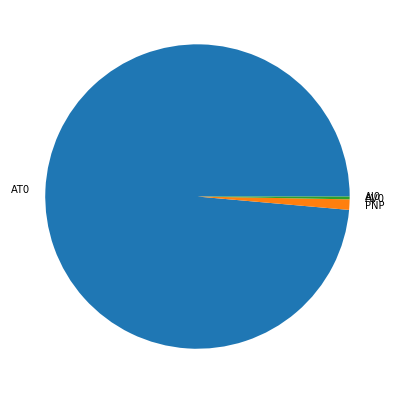

In [69]:
fig= plt.figure(figsize= (10, 7))
plt.pie(b, labels=a)

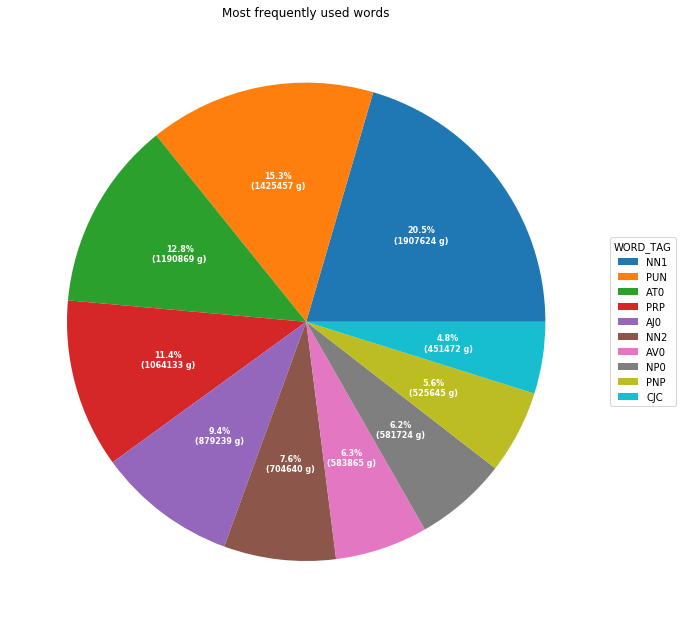

In [107]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(20,11)) 
wedges, texts, autotexts = ax.pie(b,  
                                  autopct = lambda pct: func(pct, b), 
                                  labels = a, 
                                  textprops = dict(color ="w"))

ax.legend(wedges, a, 
          title ="WORD_TAG", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Most frequently used words")  
plt.show() 